In [ ]:
"""
#in your Azure Deep Learning ubuntu vm Network Security Group, enable in&outbound rules for port 8888
#cd to the host directory where you have your custom jupyter notebooks
#in a ubuntu GPU enabled VM , open a terminal and type
sudo docker login 
sudo docker pull tensorflow/tensorflow:latest-gpu-jupyter
sudo docker run -it -p 8888:8888 -v $(pwd):/tf/notebooks tensorflow/tensorflow:latest-gpu-jupyter

#open another terminal 
type in firefox
# in the browser type in
localhost:8888
#enter key you obtained above when running docker 
run through the sample jupyter notebook you have in the host directory
reference url : 
https://www.tensorflow.org/guide/distributed_training#using_tfdistributestrategy_with_keras
https://www.tensorflow.org/install/docker

"""

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Install TensorFlow using pip in conda environment , make sure to create py36 
# conda env create -n tf2_py36 python=3.6 anaconda to create the environment
# once created the environment conda activate tf2_py36 and then pip install TF2.0
# pip install tensorflow==2.0.0 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, Callback , ModelCheckpoint
import os
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
tf.__version__

'2.0.0'

In [15]:
#check that you are inside docker's mounted host2docker directory
print(os.path.abspath('.'))
#list all files you can see from within this directory
os.listdir('.')

/tf/notebooks


[u'X.npy',
 u'.ipynb_checkpoints',
 u'binary_classification_with_TF2.0_withGPU_and_docker.ipynb',
 u'Y.npy',
 u'tf2_test.h5']

In [7]:
import numpy as np
X=np.load('X.npy')
X_std = X / 255.
y=np.load('Y.npy')
X.shape,y.shape

((100, 150, 150, 3), (100,))

In [8]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int32), array([50, 50]))

In [9]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D , Dropout,MaxPooling2D
from tensorflow.keras import Model
# this is the default distributed strategy API tensorflow2.0 
# provided for keras for one machine,multiple GPU training

mirrired_strategy=tf.distribute.MirroredStrategy()
with mirrired_strategy.scope():
    model = Sequential([
        Conv2D(8, 3, padding='same', activation='relu', input_shape=(150, 150 ,3)),
        #MaxPooling2D(),
        #Dropout(0.2),
        Conv2D(8, 3, padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3,3)),
        Dropout(0.25),
        Conv2D(16, 3, padding='same', activation='relu'),
        Conv2D(16, 3, padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3,3)),
        Dropout(0.25),
        Conv2D(24, 3, padding='same', activation='relu'),
        Conv2D(24, 3, padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3,3)),
        Dropout(0.25),
        Flatten(),
        Dense(300, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [10]:

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 8)       224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 8)       584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0

In [11]:

callbacks = [
        ModelCheckpoint(
        filepath='tf2_test.h5',
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        save_best_only=True,
        monitor='loss',
        verbose=1),
        EarlyStopping(monitor='loss',min_delta=1e-5, patience=5)
    
]
model.fit(x=X_std, y=y, epochs=100, shuffle=True, callbacks=callbacks )



Train on 100 samples
Epoch 1/100
 96/100 [===========================>..] - ETA: 0s - loss: 0.7019 - accuracy: 0.4688
Epoch 00001: loss improved from inf to 0.70398, saving model to tf2_test.h5
100/100 [==============================] - 4s 39ms/sample - loss: 0.7040 - accuracy: 0.4600
Epoch 2/100
 96/100 [===========================>..] - ETA: 0s - loss: 0.6872 - accuracy: 0.6250
Epoch 00002: loss improved from 0.70398 to 0.68754, saving model to tf2_test.h5
100/100 [==============================] - 1s 7ms/sample - loss: 0.6875 - accuracy: 0.6300
Epoch 3/100
 96/100 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5000
Epoch 00003: loss did not improve from 0.68754
100/100 [==============================] - 1s 7ms/sample - loss: 0.6913 - accuracy: 0.5000
Epoch 4/100
 96/100 [===========================>..] - ETA: 0s - loss: 0.6889 - accuracy: 0.5104
Epoch 00004: loss did not improve from 0.68754
100/100 [==============================] - 1s 7ms/sample - loss: 0.

Epoch 33/100
 96/100 [===========================>..] - ETA: 0s - loss: 0.0786 - accuracy: 0.9792
Epoch 00033: loss did not improve from 0.03528
100/100 [==============================] - 1s 6ms/sample - loss: 0.0782 - accuracy: 0.9800
Epoch 34/100
 96/100 [===========================>..] - ETA: 0s - loss: 0.0365 - accuracy: 0.9792
Epoch 00034: loss did not improve from 0.03528
100/100 [==============================] - 1s 7ms/sample - loss: 0.0359 - accuracy: 0.9800
Epoch 35/100
 96/100 [===========================>..] - ETA: 0s - loss: 0.0473 - accuracy: 0.9896
Epoch 00035: loss did not improve from 0.03528
100/100 [==============================] - 1s 7ms/sample - loss: 0.0455 - accuracy: 0.9900
Epoch 36/100
 96/100 [===========================>..] - ETA: 0s - loss: 0.0426 - accuracy: 0.9792
Epoch 00036: loss did not improve from 0.03528
100/100 [==============================] - 1s 7ms/sample - loss: 0.0410 - accuracy: 0.9800
Epoch 37/100
 96/100 [===========================>..] - 

In [13]:
from tensorflow.keras.models import load_model
loaded_model=load_model('tf2_test.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 8)       224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 8)       584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0

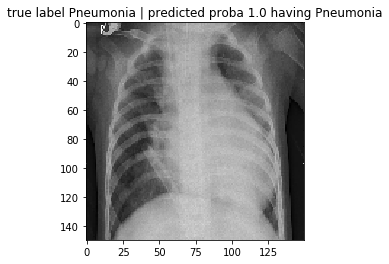

In [14]:
# use loaded model to make prediction
rn=random.randint(0,len(X)-1)
out=loaded_model.predict(X_std[rn].reshape(1,150,150,3))
true_label= 'Pneumonia' if y[rn]==1 else 'Normal'
plt.imshow(X[rn])
plt.title("true label {} | predicted proba {} having Pneumonia".format(true_label,str(round(out[0][0],3))))
plt.show()